In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

electronicthermalPropsiso (generic function with 1 method)

In [2]:
Eoff=0.0
Ts=collect(300.0:10.0:1300)
numofn=[-1.5e20,-0.7e20,-0.022e20,-0.2e20]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
numofnn=[1e17,1e17,1e17,1e17]
xs=[0.287,0.3,0.262,0.332]#collect(0.0:0.01:1.0)

#var0C=[Ts[1],xs[1],7.0]
#var0V=[Ts[1],xs[1],7.0]
var0=[Ts[1],xs[1]]
Eoff=2.0
Ev(var)=Eoff
Ec(var)=Ev(var)+EgSiGe(var[1],var[2]) #var[1]:T var[2]:x

effMassV(var)=-1.2*me
effMassC(var)=0.322*me#1.4*me#0.424*me#1.4/6^(2/3)*me

alphaC=0.0

bandC=parBandTx(effMassC(var0),alphaC,Ec(var0),[Ec],[effMassC],var0)
bandV=parBandTx(effMassV(var0),0.0,Ev(var0),[Ev],[effMassV],var0)
#bndstTx=BandStrucTx([bandV,bandC,bandC,bandC,bandC,bandC,bandC],var0)
#bndstTx=BandStrucTx([bandC,bandC,bandC,bandC,bandC,bandC,bandV],var0)
bndstTx=BandStrucTx([bandC,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI
function Deftemp(band::parBandTx)
    if band==bandC
        return 10.0
    end
    if band==bandV        
        return 7.0
    end
end
    
ksi=21.0
tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[6]),var[2],var[1],var[3],var[6])#DefP(var[1])
tauII2(var)=tauII2_func(ksi*eps0,eps0,var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(ksi*eps0,var[1],var[9])
vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
#vartau0=[bandC.effMass,Ts[1],1.0,xs[1],1.5,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2
xmax=3.0
#############Lattice Thermal Conductivity Parameters###############
thetaSiL=586 # K 
thetaSiT=240 # K
vSiL=8430    # m/s
vSiT=5840    # m/s
vGeL=4920    # m/s
vGeT=3540    # m/s
gammaL=0.3
gammaT=0.6
Eh=3.8
#vartauPH0=[integration_var,T,gammaL,gammaT,xs]
tauPHNL(var)=tauPH_N(var[3],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeL(var[5]))
tauPHNT(var)=tauPH_N(var[4],VSiGe(var[5]),var[1],var[2],MSiGe(var[5]),vSiGeT(var[5]))

tauPHUL(var)=tauPH_U(var[3],var[1],var[2],MSiGe(var[5]),vSiGeL(var[5]))
#tauPH_U(gamma::Float64,x::Float64,T::Float64,M::Float64,v::Float64,theta::Float64)

#tauPHTOT=tau_phonon_B()
########u

tauPHUL (generic function with 1 method)

In [3]:
#Profile.init(delay=0.01)

In [4]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicPropsiso(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)
x=1

225.977488 seconds (1.68 G allocations: 476.205 GB, 16.82% gc time)


1

In [5]:
Efsr=Array{Float64,3}(length(Ts),length(numofn),length(xs))
for (i,iT) in enumerate(Ts)
    for (k,kx) in enumerate(xs) 
        for (j,jn) in enumerate(numofn)
            Efsr[i,j,k]=Efs[i,j,k]-Ec([iT,kx])
        end
    end
end
Efsr[26,1,1]

0.07298189667472021

In [6]:
#Profile.clear()
#@profile (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicProps(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)
#x=1

In [7]:
#using ProfileView
#ProfileView.view()

In [8]:
#Pkg.build("ProfileView")

In [9]:
SiGe_Vin_162_Bulk_EC_T=[304.367,321.834,343.668,365.502,385.153,404.803,426.638,450.655,470.306,494.323,513.974,
535.808,551.092,568.559,579.476,599.127,620.961,640.611,658.079,679.913,699.563,719.214,741.048,760.699,782.533,
802.183,821.834,843.668,863.319,885.153,904.803,926.638,946.288,965.939,987.773,1007.42,1027.07,1046.72,1075.11,
1094.76,1114.41,1149.34,1171.18,1190.83,1210.48,1232.31,1254.15]
SiGe_Vin_162_Bulk_EC_E=[121943.783915615,132463.665216631,128860.001340144,122140.388162154,119063.352419189,
113297.757837372,108070.254310922,105664.795343141,98940.3488636701,96919.886022214,91232.5517744731,
87811.7316473481,93134.1504302798,87866.513193157,84672.5711672961,80299.3559991649,77637.3404552654,
76382.5236785823,71676.8806221553,69548.7675958382,66570.3615436335,64728.6896971345,62988.1582262535,
61336.8990517315,59010.2795907047,56852.0992637653,55503.4439886995,53591.7168642415,51805.6872283439,
50684.7509858184,49084.3317904492,47583.2468904348,46634.8306222952,45276.5263848958,44847.8760045924,
45294.9835805685,45303.6020894021,46681.8538297793,49173.153425156,50250.2462262065,50812.2335533503,
52561.5890419599,53795.2552584862,54439.8412534229,55100.0617120691,55777.7368741041,56472.6079615083]
SiGe_Vin_162_Bulk_SC_T=[318.66,446.9,505.1,582,1039,1113,1190]
SiGe_Vin_162_Bulk_SC_S=[105.96,146.7,157.6,175.6,278.9,279.8,262.7]
SiGe_Vin_163_Bulk_EC_E=[1.32058,1.36356,1.36332,1.42786,1.47098,1.55721,1.57844,1.68614,1.75072,1.7936,1.87979,
1.94414,2.00882,2.095,2.15954,2.2454,2.33163,2.39617,2.48236,2.54684,2.61143,2.67591,2.7621,2.82669,2.89117,2.97736,
3.0419,3.12813,3.19267,3.27886,3.365,3.49459,3.55917,3.5804,3.58002,3.70952,3.81741,3.92525,4.01148,4.01106,
4.1407,4.22679,4.3561,4.42063,4.52814,4.59268,4.63551,4.63504,4.61296,4.54758,4.48224]
SiGe_Vin_163_Bulk_EC_T=[313.1,328.384,339.301,358.952,367.686,385.153,404.803,431.004,448.472,468.122,487.773,
516.157,529.258,548.908,568.559,603.493,620.961,640.611,660.262,682.096,699.563,721.397,741.048,758.515,780.349,
800,819.651,837.118,856.769,876.419,898.253,913.537,931.004,950.655,968.122,987.773,1005.24,1024.89,
1042.36,1062.01,1075.11,1099.13,1127.51,1147.16,1182.1,1201.75,1223.58,1245.41,1265.07,1284.72,1302.18]
SiGe_Vin_163_Bulk_SC_T=[328.148,363.006,425.776,507.074,606.958,1011.07,1097.05,1145.83,1219.95]
SiGe_Vin_163_Bulk_SC_S=[165.84,177.781,204.665,224.544,249.394,334.819,363.676,375.603,349.581]
SiGe_Vin_68_Bulk_EC_T=[03.332,320.776,353.489,373.121,388.376,408.008,425.452,442.896,458.161,471.228,488.672,
506.111,521.362,536.612,551.863,560.578,569.279,584.529,597.592,608.467,621.529,634.592,645.471,656.346,669.413,
680.288,686.796,695.501,708.564,721.626,734.689,747.752,760.819,773.882,786.944,802.191,813.084,826.161,845.788,
863.236,885.066,906.914,926.598,935.374,944.15,950.748,957.345,963.938,970.536,979.317,983.773,985.909,992.535,
999.147,1007.95,1014.55,1023.34,1027.75,1034.34,1040.93,1047.53,1054.13,1062.92,1067.32,1073.91,1078.3,1084.9,
1091.48,1100.26,1109.04,1117.82,1126.59,1130.99,1141.95,1146.34,1152.91,1157.31,1163.87,1172.65,1183.61]
SiGe_Vin_68_Bulk_EC_E=[18.9608,19.3921,20.0819,20.4266,20.9447,21.2893,21.7207,22.1521,22.4971,23.1021,
23.5334,24.0514,24.6562,25.2609,25.8656,26.2112,26.8165,27.4213,28.1128,28.891,29.5826,30.2741,30.9658,31.744,
32.349,33.1272,33.9059,34.4246,35.1161,35.8077,36.4992,37.1907,37.7956,38.4871,39.1786,39.8699,40.3019,
40.7337,41.1649,41.5097,41.5944,41.3327,40.725,39.945,39.165,38.2986,37.4323,36.6525,35.7861,34.9195,
33.2741,34.1397,32.7539,31.6278,30.3283,29.4619,28.4222,27.556,26.8628,26.083,25.2167,24.3503,23.3972,
22.6175,22.0109,21.5776,20.7113,20.0181,19.2381,18.3715,17.5915,16.8116,16.2917,15.5115,14.9917,14.7313,
14.1249,13.8646,13.0846,12.3044]
SiGe_Vin_68_Bulk_SC_T=[310.512,345.535,378.353,408.614,552.902,687.851,818.065,905.888,976.977,1063.63]
SiGe_Vin_68_Bulk_SC_S=[480,495,523,526,537,544,542,483,375,190]
SiGe_Vin_41_Bulk_EC_T=[310.941,330.635,348.14,352.516,372.21,394.092,413.786,433.479,453.173,472.867,503.501,
521.007,540.7,558.206,575.711,593.217,612.91,628.228,645.733,665.427,682.932,698.249,715.755,733.26,744.201,
759.519,777.024,787.965,829.54,844.858,862.363,877.681,892.998,908.315,925.821,941.138,958.643,969.584,
989.278,1008.97,1026.48,1048.36,1070.24,1089.93,1118.38,1138.07,1155.58,1179.65,1190.59,1208.1]
SiGe_Vin_41_Bulk_EC_E=[3.2979,3.36214,3.38308,3.42629,3.51224,3.59809,3.64063,3.72658,3.81252,3.89847,4.02733,
4.13507,4.24272,4.37216,4.4582,4.60934,4.71698,4.82481,4.95425,5.0836,5.21304,5.34257,5.49371,5.60145,5.73117,
5.88241,6.01185,6.18497,6.48696,6.6382,6.76764,6.91887,7.0701,7.17794,7.32908,7.45861,7.65315,7.73948,7.82542,
7.84627,7.954,7.97475,8.0172,7.97295,7.86322,7.77556,7.6663,7.57846,7.40439,7.29513]
SiGe_Vin_41_Bulk_SC_T=[301.423,397.079,492.595,592.772,718.465,853.442,967.386,1027.72,1085.67,1154.87]
SiGe_Vin_41_Bulk_SC_S=[253,286,304,323,335,345,344,330,309,248]
#plot(SiGe_Vin_162_Bulk_EC_T,SiGe_Vin_162_Bulk_EC_E, linestyle="None",marker=".",markersize=20,color="r")
x=1

1

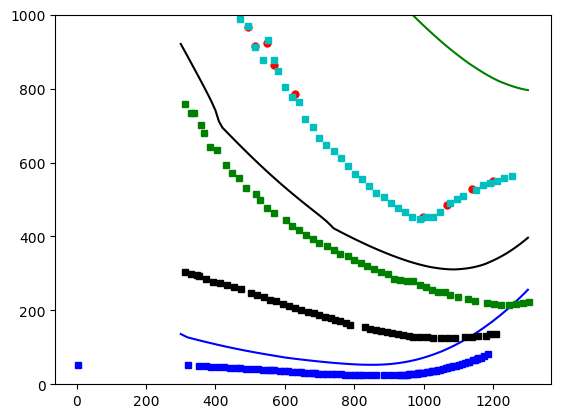

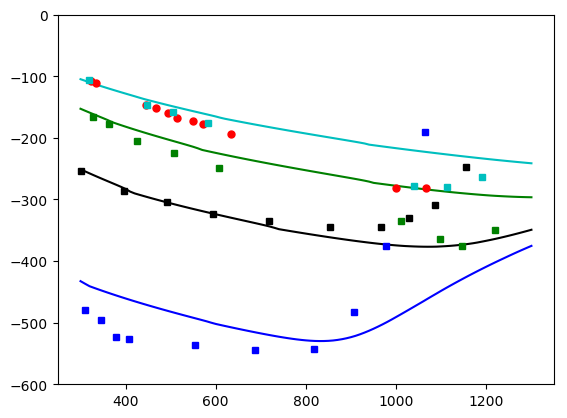

In [10]:
colors=["b","g","r","c","m","y","k"]
PS_Sn06_0PAEC=[10.0,13.0,17.0,25.0,30.0,46.0,88.0,108.0,232.0]
PS_Sn06_0PASC=[327.0,241.0,105.0,98.0,74.0,62.0,42.0,35.0,15.0]
PS_Sn06_0PAEC_1=[85.0,80.0,70.0,72.0,98.0,109.0,131.0,172.0,229.0]
PS_Sn06_0PASC_1=[348.0,385.0,406.0,371.0,352.0,338.0,301.0,277.0,271.0]
SY_16B_Sigma_Temp=[334,442,494,515,548,569,630,999,1066,1140,1200]
SY_16B_Sigma=[129449.8,106450.9,96730.51,91575.09,92208.39,86415.49,78529.92,45374.11,48600.31,52723.15,55069.11]
SY_16B_Seebeck=[-107,-111,-147,-151,-160,-167,-172,-177,-194,-282,-281]
SY_16B_Seebeck_Temp=[323,335,445,467,494,515,550,571,633,999,1067]
plots=Array{Any}(length(numofn)*length(xs))
figure()
k=1
plot(Ts,6^(2/3)*sigmas[:,1,1]/100,linestyle=":",color="c")
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="c")
plot(Ts,sigmas[:,2,2]/100,linestyle="-",color="g")
plot(Ts,sigmas[:,3,3]/100,linestyle="-",color="b")
plot(Ts,sigmas[:,4,4]/100,linestyle="-",color="k")       
plot(SY_16B_Sigma_Temp,SY_16B_Sigma/100, linestyle="None",marker=".",markersize=10,color="r")
plot(SiGe_Vin_162_Bulk_EC_T,SiGe_Vin_162_Bulk_EC_E/100, linestyle="None",marker="s",markersize=4,color="c")
plot(SiGe_Vin_163_Bulk_EC_T,1e3./SiGe_Vin_163_Bulk_EC_E, linestyle="None",marker="s",markersize=4,color="g")
plot(SiGe_Vin_68_Bulk_EC_T,1e3./SiGe_Vin_68_Bulk_EC_E, linestyle="None",marker="s",markersize=4,color="b")
plot(SiGe_Vin_41_Bulk_EC_T,1e3./SiGe_Vin_41_Bulk_EC_E, linestyle="None",marker="s",markersize=4,color="k")
ylim(0,1000)
legend(loc="upper right")
figure()
plot(Ts,1e6*seebecks[:,1,1],color="c") 
plot(Ts,1e6*seebecks[:,2,2],color="g") 
plot(Ts,1e6*seebecks[:,3,3],color="b") 
plot(Ts,1e6*seebecks[:,4,4],color="k")        
plot(SY_16B_Seebeck_Temp,SY_16B_Seebeck, linestyle="None",marker=".",markersize=10,color="r")
plot(SiGe_Vin_162_Bulk_SC_T,-SiGe_Vin_162_Bulk_SC_S, linestyle="None",marker="s",markersize=4,color="c")
plot(SiGe_Vin_163_Bulk_SC_T,-SiGe_Vin_163_Bulk_SC_S, linestyle="None",marker="s",markersize=4,color="g")
plot(SiGe_Vin_68_Bulk_SC_T,-SiGe_Vin_68_Bulk_SC_S, linestyle="None",marker="s",markersize=4,color="b")
plot(SiGe_Vin_41_Bulk_SC_T,-SiGe_Vin_41_Bulk_SC_S, linestyle="None",marker="s",markersize=4,color="k")
ylim(-600,0)
legend(loc="upper right")